In [237]:
# the project is in two files, as the file hanged again and again
# so made a division of data and code
# please find files named Project_11_cencus and Project_11_cencus_xgb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
colnames=['age','workclass','fnlwgt','edu','edunum','maritalstatus','occupation','relationship',
         'race','sex','capgain','caploss','hoursperweek','nativecountry','target']
cen=pd.read_csv('census.csv',header=None,names=colnames)
cen.head()

,age,workclass,fnlwgt,edu,edunum,maritalstatus,occupation,relationship,race,sex,capgain,caploss,hoursperweek,nativecountry,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
cen.shape

(32561, 15)

In [4]:
cen.dtypes

age               int64
workclass        object
fnlwgt            int64
edu              object
edunum            int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capgain           int64
caploss           int64
hoursperweek      int64
nativecountry    object
target           object
dtype: object

In [5]:
# lets convert the target
# <=50K ---> 0
# >50K ---> 1

In [6]:
cen['target']=cen['target'].str.replace('<=50K','0')

In [7]:
cen['target']=cen['target'].str.replace('>50K','1')

In [8]:
cen['target']=cen['target'].astype(np.int64)
cen['target'].dtype

dtype('int64')

In [9]:
cen.isnull().sum()

age              0
workclass        0
fnlwgt           0
edu              0
edunum           0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capgain          0
caploss          0
hoursperweek     0
nativecountry    0
target           0
dtype: int64

In [10]:
# there are no missing values

# EDA

# Univariate

In [11]:
cen.head(1)

,age,workclass,fnlwgt,edu,edunum,maritalstatus,occupation,relationship,race,sex,capgain,caploss,hoursperweek,nativecountry,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


In [12]:
cen.columns

Index(['age', 'workclass', 'fnlwgt', 'edu', 'edunum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss', 'hoursperweek', 'nativecountry', 'target'], dtype='object')

In [13]:
cen.describe()[['age','fnlwgt','capgain','caploss','hoursperweek']]

,age,fnlwgt,capgain,caploss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


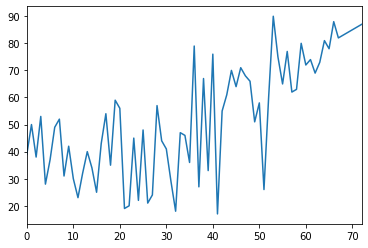

In [14]:
pd.Series(cen['age'].unique()).plot()

In [15]:
cen['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [16]:
# there is an unknown class ?
# we'll replace it with 'unknown' for now

In [17]:
cen['workclass']=cen['workclass'].str.replace('?','unknown')

In [18]:
cen['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

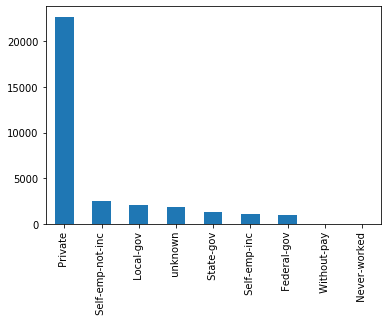

In [19]:
cen['workclass'].value_counts().plot.bar()

In [20]:
# we have a lot of scope of binning in workclass

In [21]:
cen.columns

Index(['age', 'workclass', 'fnlwgt', 'edu', 'edunum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss', 'hoursperweek', 'nativecountry', 'target'], dtype='object')

In [22]:
cen['edu'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: edu, dtype: int64

In [23]:
# we have a lot of scope of binning in edu

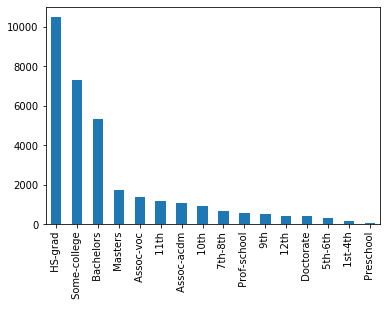

In [24]:
cen['edu'].value_counts().plot.bar()

In [25]:
cen['edunum'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: edunum, dtype: int64

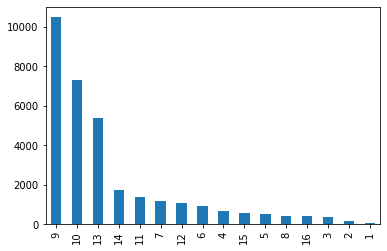

In [26]:
cen['edunum'].value_counts().plot.bar()

In [27]:
cen['maritalstatus'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

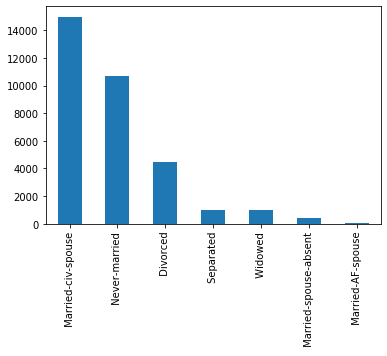

In [28]:
cen['maritalstatus'].value_counts().plot.bar()

In [29]:
cen['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [30]:
cen['occupation']=cen['occupation'].str.replace('?','unknown')

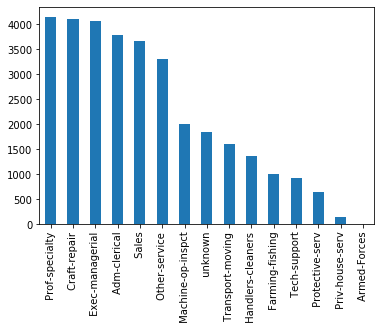

In [31]:
cen['occupation'].value_counts().plot.bar()

In [32]:
cen['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

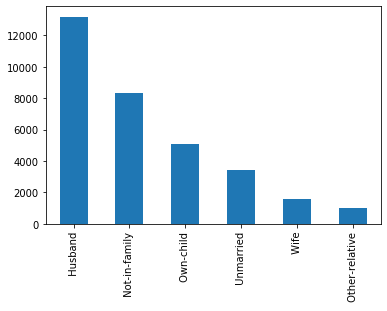

In [33]:
cen['relationship'].value_counts().plot.bar()

In [34]:
cen['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

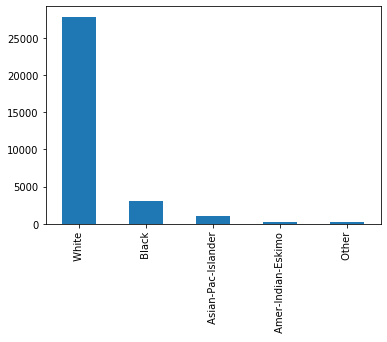

In [35]:
cen['race'].value_counts().plot.bar()

In [36]:
cen['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

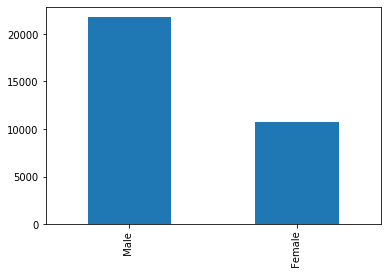

In [37]:
cen['sex'].value_counts().plot.bar()

In [38]:
cen['nativecountry'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [39]:
cen['nativecountry']=cen['nativecountry'].str.replace('?','unknown')

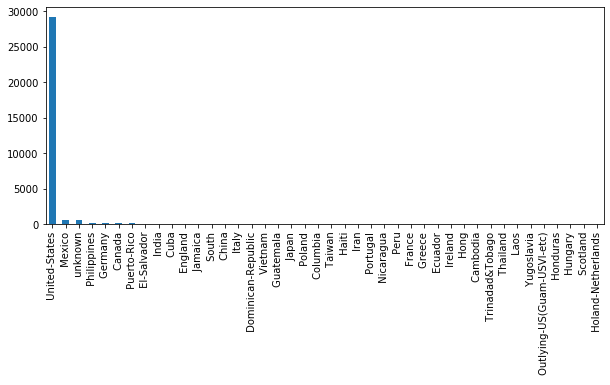

In [40]:
plt.figure(figsize=(10,4))
cen['nativecountry'].value_counts().plot.bar()

In [41]:
cen['target'].value_counts()

0    24720
1     7841
Name: target, dtype: int64

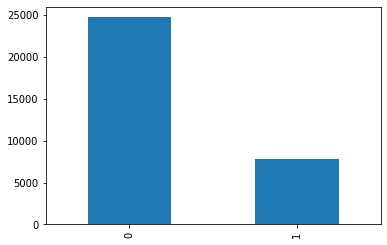

In [42]:
cen['target'].value_counts().plot.bar()

In [43]:
# the data of features is highly unbalanced

In [44]:
# let's make a copy of data and apply feature binning
cencopy=cen.copy()

In [45]:
# lets apply binning in:
#     workclass,edu,edunum,maritalstatus,occupation,relationship,race,nativecountry

In [46]:
df=cencopy['workclass'].value_counts()  
for i in range(len(df)):
    if df[i] < 1000:
        str=df.index[i]
        cencopy['workclass']=cencopy['workclass'].str.replace(str,'Rare')

In [47]:
df=cencopy['edu'].value_counts()  
for i in range(len(df)):
    if df[i] < 930:
        str=df.index[i]
        cencopy['edu']=cencopy['edu'].str.replace(str,'Rare')

In [48]:
# edunum and edu are same, edunum is just label encoder of edu
df=cencopy['edunum'].value_counts()  
for i in range(len(df)):
    if df.iloc[i] < 930:
        original=df.index[i]
        cencopy['edunum']=cencopy['edunum'].replace(original,0)

In [49]:
df=cencopy['maritalstatus'].value_counts()  
for i in range(len(df)):
    if df[i] < 1000:
        original=df.index[i]
        cencopy['maritalstatus']=cencopy['maritalstatus'].str.replace(original,'Rare')

In [50]:
df=cencopy['occupation'].value_counts()  
for i in range(len(df)):
    if df[i] < 1000:
        original=df.index[i]
        cencopy['occupation']=cencopy['occupation'].str.replace(original,'Rare')

In [51]:
df=cencopy['relationship'].value_counts()  
for i in range(len(df)):
    if df[i] < 2000:
        original=df.index[i]
        cencopy['relationship']=cencopy['relationship'].str.replace(original,'Rare')

In [52]:
df=cencopy['race'].value_counts()  
for i in range(len(df)):
    if df[i] < 2000:
        original=df.index[i]
        cencopy['race']=cencopy['race'].str.replace(original,'Rare')

In [53]:
df=cencopy['nativecountry'].value_counts()  
for i in range(len(df)):
    if df[i] < 200:
        original=df.index[i]
        cencopy['nativecountry']=cencopy['nativecountry'].str.replace(original,'Rare')

In [54]:
cencopy['nativecountry'].value_counts()

 United-States                 29170
Rare                            2151
 Mexico                          643
 unknown                         583
 Outlying-US(Guam-USVI-etc)       14
Name: nativecountry, dtype: int64

# Bivariate

In [55]:
# do analysis on cencopy 

In [56]:
cencopy.columns

Index(['age', 'workclass', 'fnlwgt', 'edu', 'edunum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss', 'hoursperweek', 'nativecountry', 'target'], dtype='object')

In [57]:
cencopy.groupby('target').mean()[['age','fnlwgt','capgain','caploss','hoursperweek']]

,age,fnlwgt,capgain,caploss,hoursperweek
target,,,,,
0,36.783738,190340.86517,148.752468,53.142921,38.840210
1,44.249841,188005.00000,4006.142456,195.001530,45.473026


In [58]:
cencopy.groupby('target').min()[['age','fnlwgt','capgain','caploss','hoursperweek']]

,age,fnlwgt,capgain,caploss,hoursperweek
target,,,,,
0,17,12285,0,0,1
1,19,14878,0,0,1


In [59]:
cencopy.groupby('target').max()[['age','fnlwgt','capgain','caploss','hoursperweek']]

,age,fnlwgt,capgain,caploss,hoursperweek
target,,,,,
0,90,1484705,41310,4356,99
1,90,1226583,99999,3683,99


In [60]:
cencopy.groupby('sex').mean()[['age','fnlwgt','capgain','caploss','hoursperweek']]

,age,fnlwgt,capgain,caploss,hoursperweek
sex,,,,,
Female,36.858230,185746.311206,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,1329.370078,100.213309,42.428086


In [61]:
cencopy.columns

Index(['age', 'workclass', 'fnlwgt', 'edu', 'edunum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss', 'hoursperweek', 'nativecountry', 'target'], dtype='object')

In [62]:
pd.crosstab(cencopy['workclass'],cencopy['target'])

target,0,1
workclass,,
Local-gov,1476,617
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
unknown,1645,191
Rare,610,371


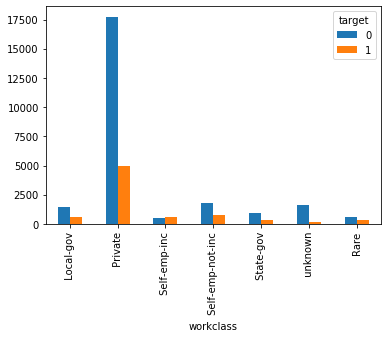

In [63]:
pd.crosstab(cencopy['workclass'],cencopy['target']).plot.bar()

In [64]:
pd.crosstab(cencopy['edu'],cencopy['target'])

target,0,1
edu,,
10th,871,62
11th,1115,60
Assoc-acdm,802,265
Assoc-voc,1021,361
Bachelors,3134,2221
HS-grad,8826,1675
Masters,764,959
Some-college,5904,1387
Rare,2283,851


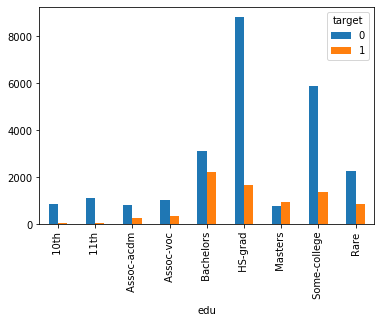

In [65]:
pd.crosstab(cencopy['edu'],cencopy['target']).plot.bar()

In [66]:
pd.crosstab(cencopy['maritalstatus'],cencopy['target'])

target,0,1
maritalstatus,,
Divorced,3980,463
Married-civ-spouse,8284,6692
Never-married,10192,491
Separated,959,66
Rare,1305,129


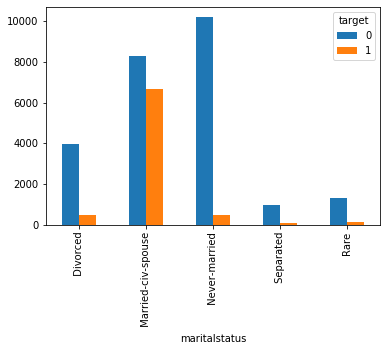

In [67]:
pd.crosstab(cencopy['maritalstatus'],cencopy['target']).plot.bar()

In [68]:
pd.crosstab(cencopy['occupation'],cencopy['target'])

target,0,1
occupation,,
Adm-clerical,3263,507
Craft-repair,3170,929
Exec-managerial,2098,1968
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137
Prof-specialty,2281,1859
Sales,2667,983
Transport-moving,1277,320


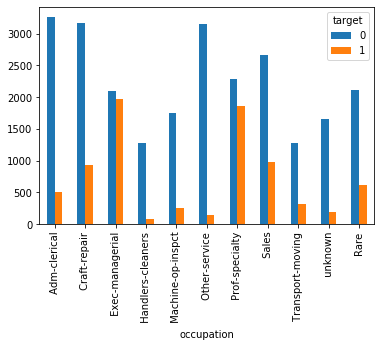

In [69]:
pd.crosstab(cencopy['occupation'],cencopy['target']).plot.bar()

In [70]:
pd.crosstab(cencopy['relationship'],cencopy['target'])

target,0,1
relationship,,
Husband,7275,5918
Not-in-family,7449,856
Own-child,5001,67
Unmarried,3228,218
Rare,1767,782


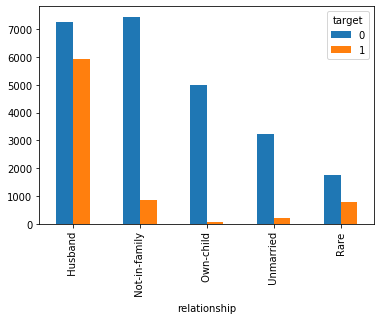

In [71]:
pd.crosstab(cencopy['relationship'],cencopy['target']).plot.bar()

In [72]:
pd.crosstab(cencopy['race'],cencopy['target'])

target,0,1
race,,
Black,2737,387
White,20699,7117
Rare,1284,337


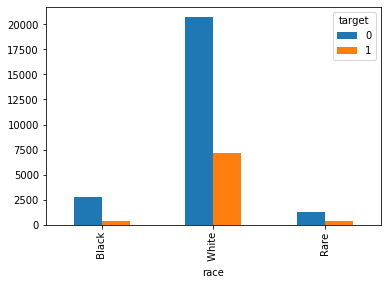

In [73]:
pd.crosstab(cencopy['race'],cencopy['target']).plot.bar()

In [74]:
pd.crosstab(cencopy['sex'],cencopy['target'])

target,0,1
sex,,
Female,9592,1179
Male,15128,6662


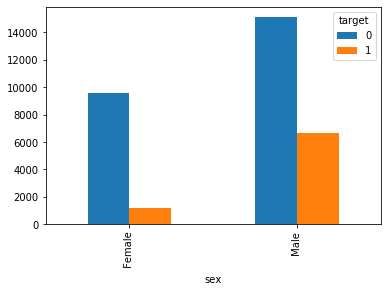

In [75]:
pd.crosstab(cencopy['sex'],cencopy['target']).plot.bar()

In [76]:
pd.crosstab(cencopy['nativecountry'],cencopy['target'])

target,0,1
nativecountry,,
Mexico,610,33
Outlying-US(Guam-USVI-etc),14,0
United-States,21999,7171
unknown,437,146
Rare,1660,491


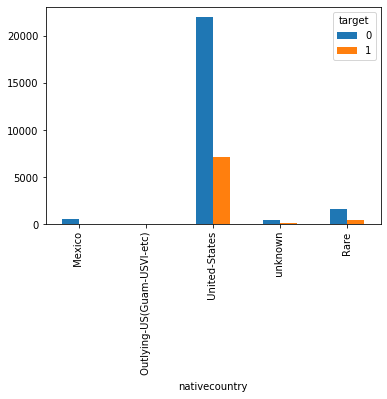

In [77]:
pd.crosstab(cencopy['nativecountry'],cencopy['target']).plot.bar()

In [78]:
cencopy.columns

Index(['age', 'workclass', 'fnlwgt', 'edu', 'edunum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss', 'hoursperweek', 'nativecountry', 'target'], dtype='object')

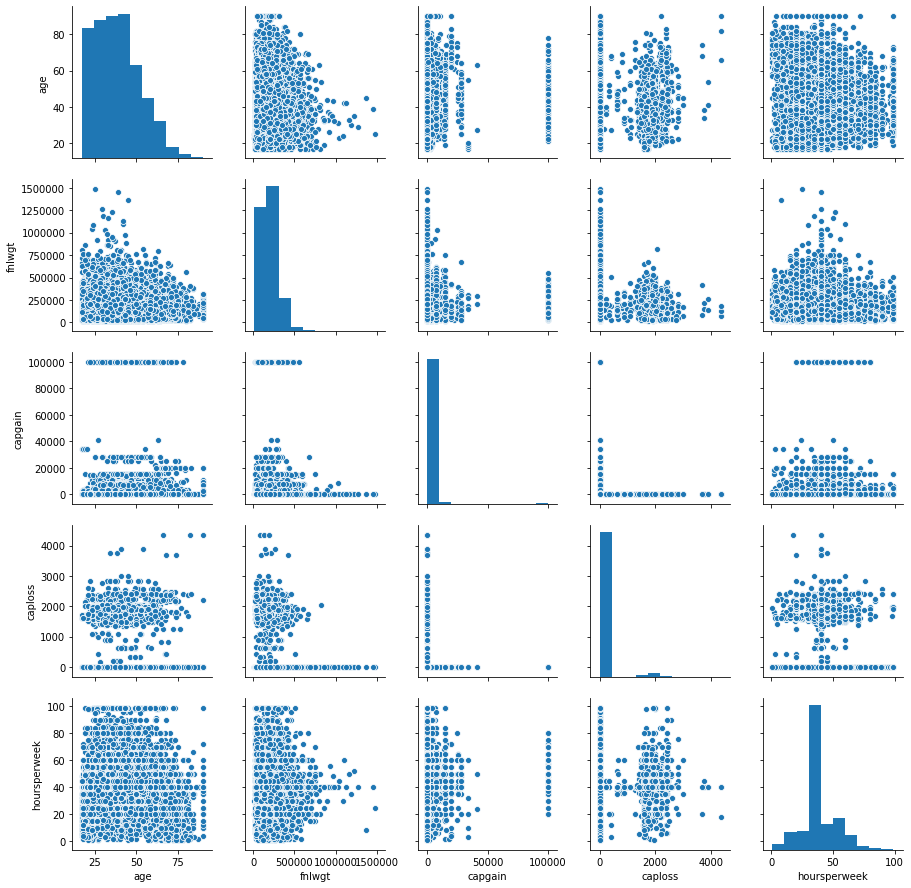

In [79]:
sns.pairplot(data=cencopy,vars=['age','fnlwgt','capgain','caploss','hoursperweek'])

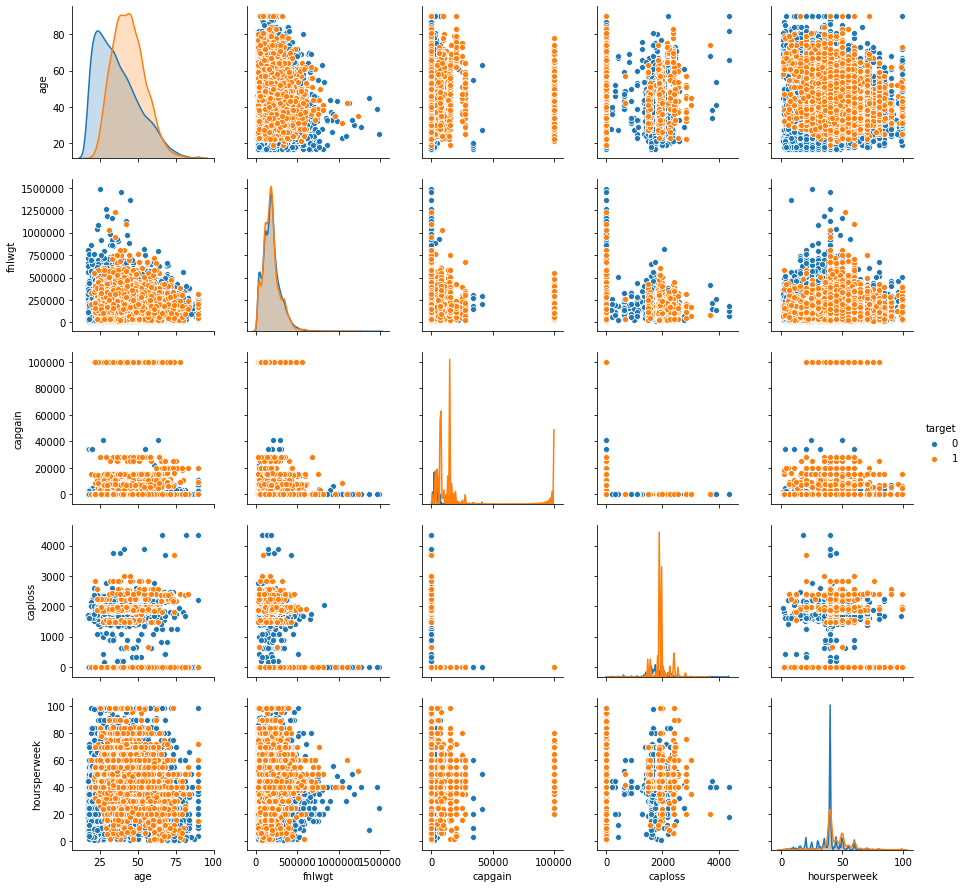

In [80]:
sns.pairplot(data=cencopy,vars=['age','fnlwgt','capgain','caploss','hoursperweek'],hue='target')

# Distribution and Correlation for Cencopy

In [81]:
# In order to make distplot and boxplot, we'll do label encoding

In [82]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [83]:
# we'll first drop edu, as it's already encoded
cencopy.drop('edu',axis=1,inplace=True)

In [84]:
le(cencopy,'workclass')
le(cencopy,'maritalstatus')
le(cencopy,'occupation')
le(cencopy,'relationship')
le(cencopy,'race')
le(cencopy,'sex')
le(cencopy,'nativecountry')

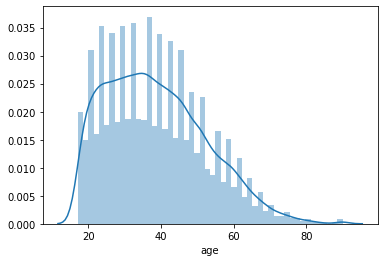

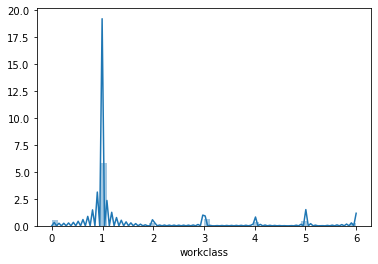

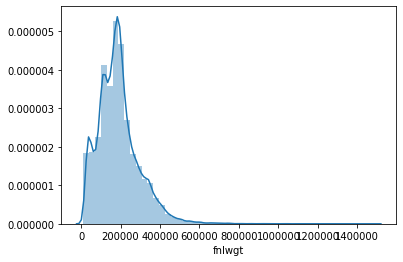

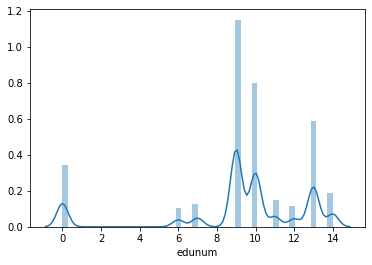

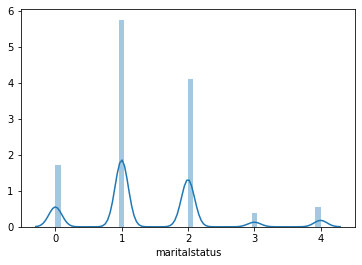

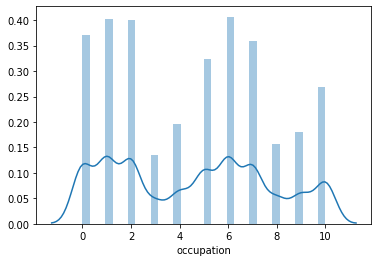

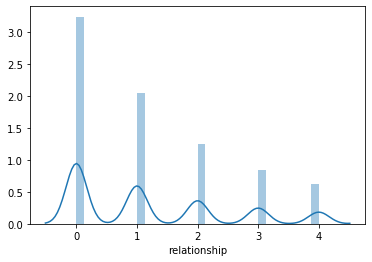

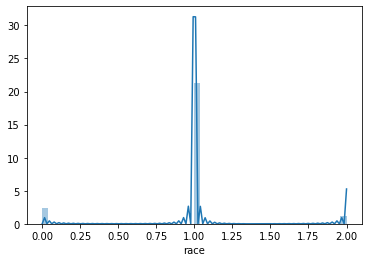

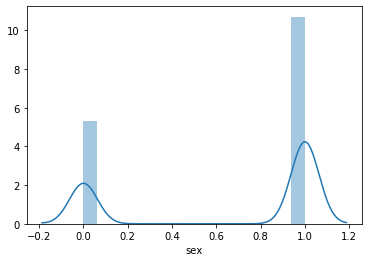

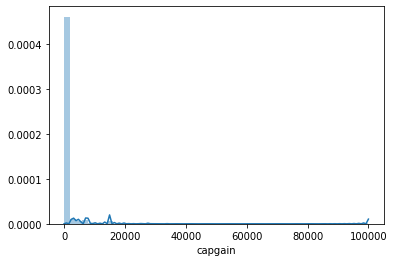

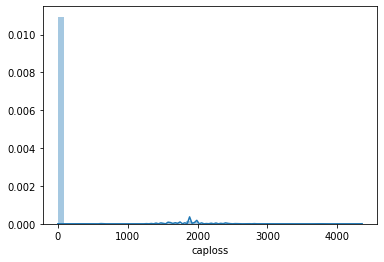

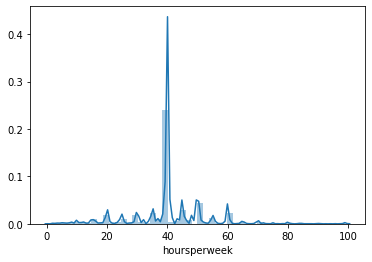

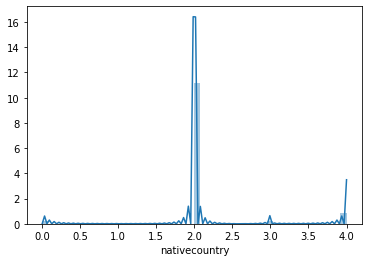

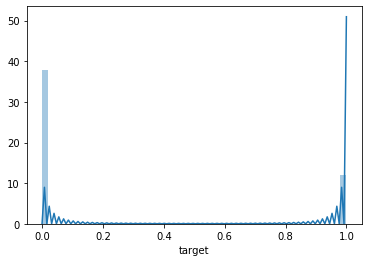

In [85]:
cols=cencopy.columns.values
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(cencopy[i])

In [86]:
cencopy.skew()

age               0.558743
workclass         1.719315
fnlwgt            1.446980
edunum           -1.413579
maritalstatus     0.787585
occupation        0.128427
relationship      0.815471
race             -0.481077
sex              -0.719293
capgain          11.953848
caploss           4.594629
hoursperweek      0.227643
nativecountry     1.313034
target            1.212430
dtype: float64

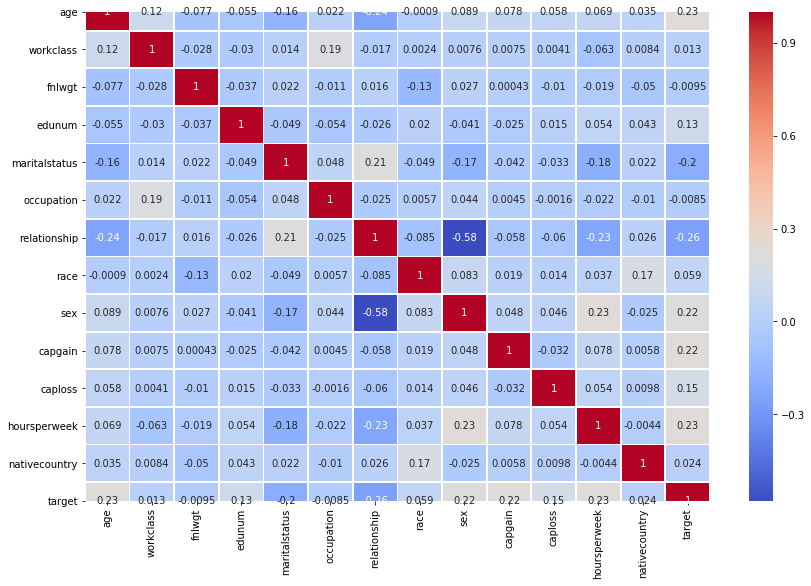

In [87]:
plt.figure(figsize=(14,9))
sns.heatmap(cencopy.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Outliers for Cencopy

In [88]:
# making boxplots

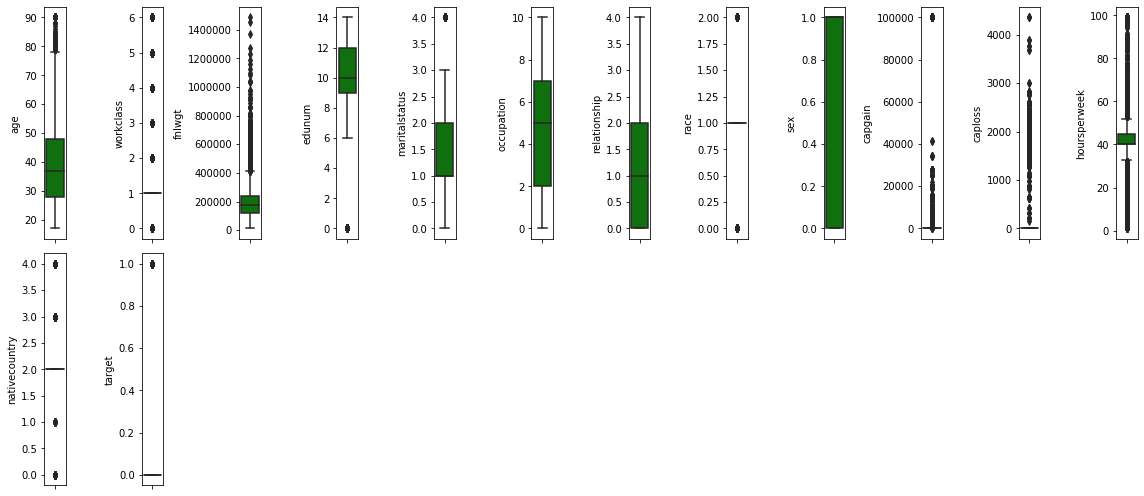

In [89]:
plt.figure(figsize=(16,48))
for i in range(len(cols)):
    plt.subplot(14,12,i+1)
    sns.boxplot(cencopy[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [90]:
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def remove_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)

In [91]:
outlier(cencopy)

age               143
workclass        9865
fnlwgt            992
edunum           3134
maritalstatus    1434
occupation          0
relationship        0
race             4745
sex                 0
capgain          2712
caploss          1519
hoursperweek     9008
nativecountry    3391
target           7841
dtype: int64

In [92]:
# in continuos variables, there are outliers in fnlwgt,capgain,caploss

In [93]:
from scipy.stats import zscore
z=np.abs(zscore(cencopy))
np.where(z>3)

(array([    4,     6,    10, ..., 32533, 32547, 32553], dtype=int64),
 array([12, 12, 11, ..., 12, 12, 12], dtype=int64))

In [94]:
len(np.where(z>3)[0])

6368

In [95]:
# there are 6368 outliers i.e. there are outliers in around 20% of the data

In [96]:
# let's make a copy of cencopy
cencopy1=cencopy.copy()

In [97]:
cencopy1=cencopy1[(z<3).all(axis=1)]

In [98]:
# check outliers in cencopy1 again using IQR method
outlier(cencopy1)

age                33
workclass        7444
fnlwgt            647
edunum           2008
maritalstatus    1048
occupation          0
relationship        0
race             3281
sex                 0
capgain          2169
caploss            41
hoursperweek     7229
nativecountry     519
target           5900
dtype: int64

In [99]:
z2=np.abs(zscore(cencopy1))
len(np.where(z2>3)[0])

2465

# Distribution and Correlation Cen

In [100]:
# we'll first drop edu, as it's already encoded
cen.drop('edu',axis=1,inplace=True)

In [101]:
le(cen,'workclass')
le(cen,'maritalstatus')
le(cen,'occupation')
le(cen,'relationship')
le(cen,'race')
le(cen,'sex')
le(cen,'nativecountry')

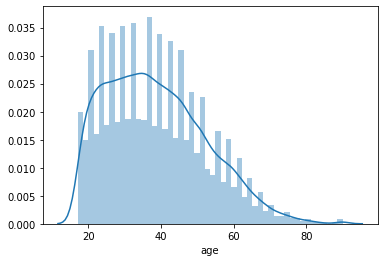

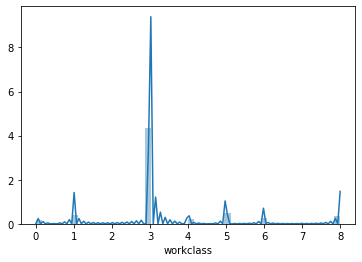

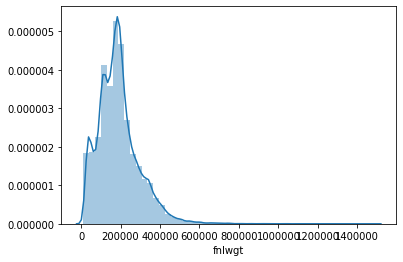

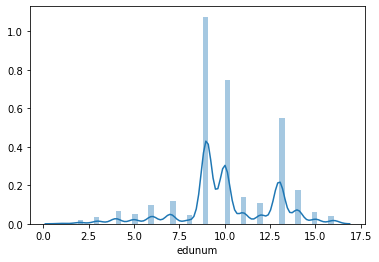

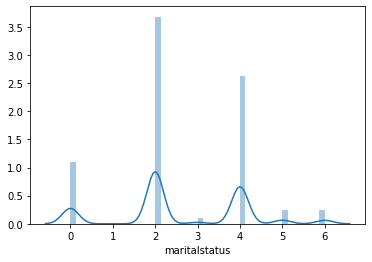

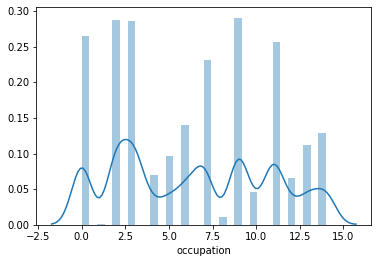

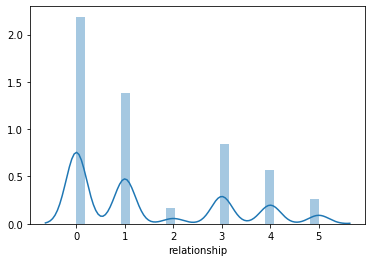

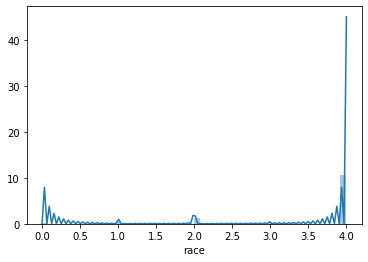

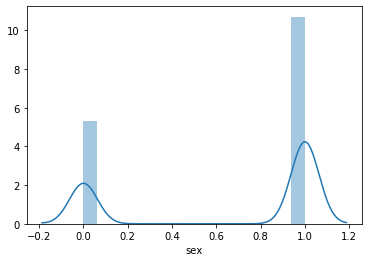

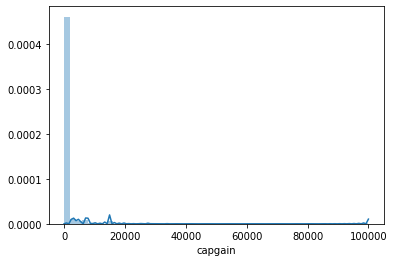

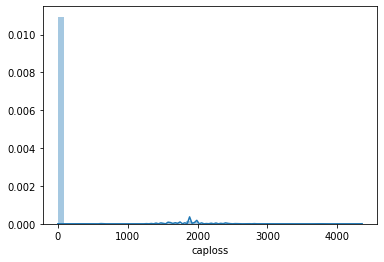

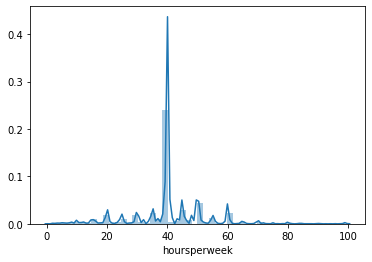

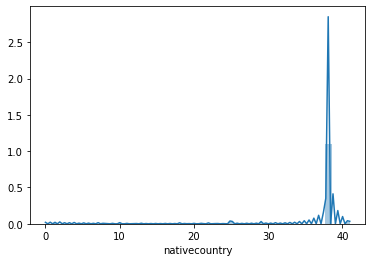

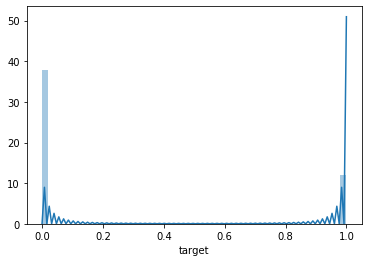

In [102]:
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(cen[i])

In [103]:
cen.skew()

age               0.558743
workclass         1.167150
fnlwgt            1.446980
edunum           -0.311676
maritalstatus    -0.013508
occupation        0.126728
relationship      0.786818
race             -2.435386
sex              -0.719293
capgain          11.953848
caploss           4.594629
hoursperweek      0.227643
nativecountry    -4.205965
target            1.212430
dtype: float64

In [104]:
# skewness in fnlwgt,capgain,caploss

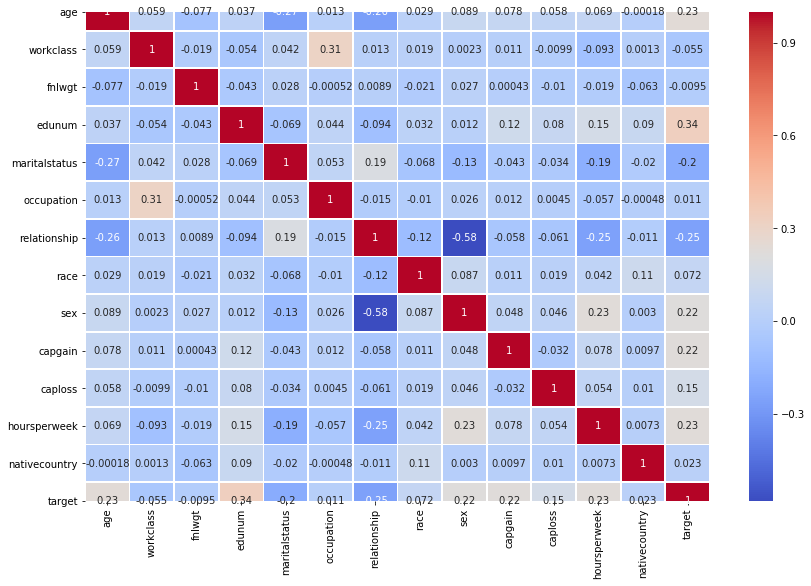

In [105]:
plt.figure(figsize=(14,9))
sns.heatmap(cen.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Outliers for Cen

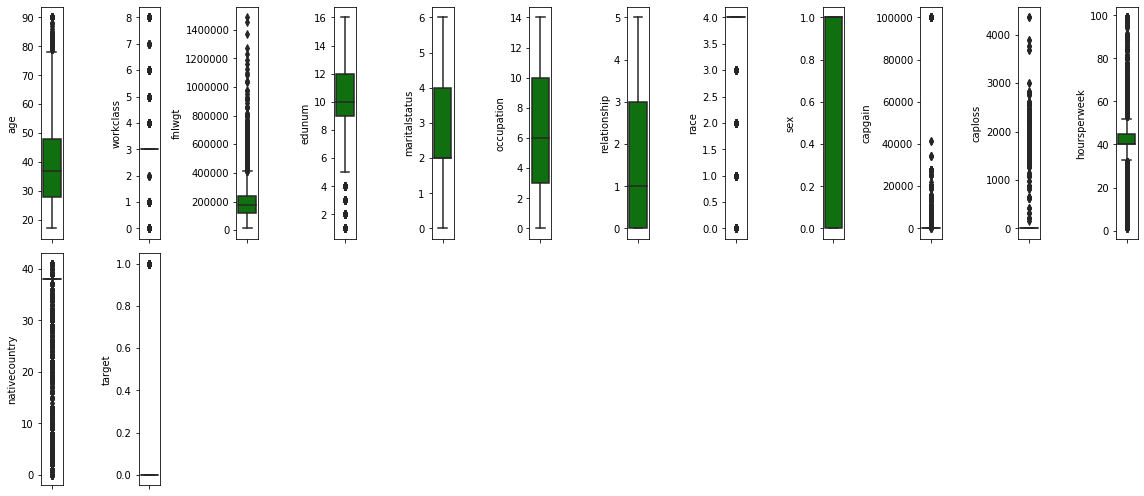

In [106]:
plt.figure(figsize=(16,48))
for i in range(len(cols)):
    plt.subplot(14,12,i+1)
    sns.boxplot(cen[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [107]:
outlier(cen)

age               143
workclass        9865
fnlwgt            992
edunum           1198
maritalstatus       0
occupation          0
relationship        0
race             4745
sex                 0
capgain          2712
caploss          1519
hoursperweek     9008
nativecountry    3391
target           7841
dtype: int64

In [108]:
from scipy.stats import zscore
z=np.abs(zscore(cen))
np.where(z>3)

(array([    4,    10,    11, ..., 32533, 32551, 32553], dtype=int64),
 array([12, 11,  7, ...,  7,  7,  7], dtype=int64))

In [109]:
len(np.where(z>3)[0])

5275

In [110]:
cen=cen[(z<3).all(axis=1)]

In [111]:
cen.shape

(27784, 14)

# Model Building

In [112]:
# this is a classification problem with 2 classes

In [113]:
# lets seperate x and y first

In [114]:
x=cen.drop('target',axis=1)
y=cen['target']

In [115]:
xc=cencopy1.drop('target',axis=1)
yc=cencopy1['target']

In [116]:
# now we'll try some iterations of feature selection and feature engineering (like binning)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [212]:
# Now, let's define some functions to reuse them
def fitc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    
def get_scorec(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return train_score,test_score

def get_predc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metricsc(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(pred,y_test)
    conf=confusion_matrix(pred,y_test)
    clas=classification_report(pred,y_test)
    return acc,conf,clas

from sklearn.model_selection import GridSearchCV
def gridcvc(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=5,scoring='accuracy')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcvc(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=3,n_iter=50,
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpcac(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pcac(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca

def crossc(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def stdc(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfec(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def modified_ffsc(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def modified_pcac(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=accuracy_score(pred,y_test)
    return test_score

def ttsc(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    return x_train, x_test, y_train, y_test

def classification(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs,stratify=y)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    clas=classification_report(pred,y_test)
    return clas

In [119]:
lrc=LogisticRegression(n_jobs=-1,random_state=45)
dtc=DecisionTreeClassifier(random_state=45)
svc=SVC(random_state=45)
knnc=KNeighborsClassifier(n_jobs=-1)
rfc=RandomForestClassifier(n_jobs=-1,random_state=45)
gbc=GradientBoostingClassifier(random_state=45)
xgbc=XGBClassifier(n_jobs=-1,random_state=45)
adac=AdaBoostClassifier(random_state=45)
gnb=GaussianNB()
mnb=MultinomialNB()

# Iteration A

In [120]:
# without feature binning
print("LR ", get_scorec(lrc,x,y))
print("DT ", get_scorec(dtc,x,y))
print("SVC ", get_scorec(svc,x,y))
print("KNN ", get_scorec(knnc,x,y))
print("GNB ", get_scorec(gnb,x,y))
print("MNB ", get_scorec(mnb,x,y))
print("RF ", get_scorec(rfc,x,y))
print("GB ", get_scorec(gbc,x,y))
print("XGB ", get_scorec(xgbc,x,y))

LR  (0.8091467511277474, 0.8096746328822344)
DT  (1.0, 0.8096746328822344)
SVC  (0.9976485267300125, 0.7764180823495537)
KNN  (0.8364526346098474, 0.7774258566081198)
GNB  (0.8011805355600345, 0.8027641808234955)
MNB  (0.7921105672329398, 0.793118341491506)
RF  (0.986850945388233, 0.847682119205298)
GB  (0.8668778193684614, 0.8661099913619349)
XGB  (0.9107399942412899, 0.868701410883962)


In [121]:
# most of the models are over fitting

# Iteartion B

In [122]:
# with feature binning
print("LR ", get_scorec(lrc,xc,yc))
print("DT ", get_scorec(dtc,xc,yc))
print("SVC ", get_scorec(svc,xc,yc))
print("KNN ", get_scorec(knnc,xc,yc))
print("GNB ", get_scorec(gnb,xc,yc))
print("MNB ", get_scorec(mnb,xc,yc))
print("RF ", get_scorec(rfc,xc,yc))
print("GB ", get_scorec(gbc,xc,yc))
print("XGB ", get_scorec(xgbc,xc,yc))

LR  (0.8075958258077464, 0.8091798344620015)
DT  (0.9999498294200281, 0.800150489089541)
SVC  (0.9964378888219948, 0.7786305492851768)
KNN  (0.8376981737908891, 0.7912716328066215)
GNB  (0.7971603451735902, 0.7978931527464259)
MNB  (0.7939494280553884, 0.7944319036869827)
RF  (0.9867549668874173, 0.8487584650112867)
GB  (0.8628336343568132, 0.8627539503386005)
XGB  (0.9129038731687739, 0.8615500376222723)


In [123]:
# svc takes around 2 minutes

In [124]:
# we'll use the features with binning

# Iteartion 1

In [125]:
# lets std scale the data
xcs=stdc(xc)

In [126]:
# with feature binning
print("LR ", get_scorec(lrc,xcs,yc))
print("DT ", get_scorec(dtc,xcs,yc))
print("SVC ", get_scorec(svc,xcs,yc))
print("KNN ", get_scorec(knnc,xcs,yc))
print("GNB ", get_scorec(gnb,xcs,yc))
# print("MNB ", get_scorec(mnb,xcs,yc))
print("RF ", get_scorec(rfc,xcs,yc))
print("GB ", get_scorec(gbc,xcs,yc))
print("XGB ", get_scorec(xgbc,xcs,yc))

LR  (0.8145695364238411, 0.81790820165538)
DT  (0.9999498294200281, 0.8)
SVC  (0.8505920128436685, 0.8480060195635817)
KNN  (0.884406983744732, 0.8344620015048909)
GNB  (0.7729279550471604, 0.7715575620767494)
RF  (0.9868051374673891, 0.8487584650112867)
GB  (0.8628336343568132, 0.8627539503386005)
XGB  (0.9129038731687739, 0.8615500376222723)


# Iteartion 2

In [127]:
# lets try to remove skewness

In [128]:
xc.skew()

age               0.494669
workclass         1.742136
fnlwgt            0.634075
edunum           -1.498108
maritalstatus     0.711031
occupation        0.117355
relationship      0.787633
race             -1.075335
sex              -0.681617
capgain           4.908788
caploss          30.234239
hoursperweek     -0.359033
nativecountry     6.549236
dtype: float64

In [129]:
# lets remove skewness from fnlwgt, caploss and capgain

In [130]:
xc_sk=xc.copy()

In [131]:
# xc_sk['fnlwgt'].min(), xc_sk['fnlwgt'].max()
xc_sk['fnlwgt']=np.power(xc_sk['fnlwgt'],4/7)
# skewness reduced to 0.005

In [132]:
# xc_sk['capgain'].min(), xc_sk['capgain'].max()
xc_sk['capgain']=np.power(xc_sk['capgain'],1/5)
# skewness reduced to 3.17

In [133]:
# xc_sk['caploss'].min(), xc_sk['caploss'].max()
xc_sk['caploss']=np.power(xc_sk['caploss'],1/5)
# skewness reduced to 25.77

In [134]:
# with feature binning
print("LR ", get_scorec(lrc,xc_sk,yc))
print("DT ", get_scorec(dtc,xc_sk,yc))
print("SVC ", get_scorec(svc,xc_sk,yc))
print("KNN ", get_scorec(knnc,xc_sk,yc))
print("GNB ", get_scorec(gnb,xc_sk,yc))
print("MNB ", get_scorec(mnb,xc_sk,yc))
print("RF ", get_scorec(rfc,xc_sk,yc))
print("GB ", get_scorec(gbc,xc_sk,yc))
print("XGB ", get_scorec(xgbc,xc_sk,yc))

LR  (0.806241220148505, 0.8043641835966893)
DT  (0.9999498294200281, 0.7995485327313769)
SVC  (0.9737106160947221, 0.7792325056433409)
KNN  (0.844019666867349, 0.7706546275395034)
GNB  (0.7421733895243829, 0.7379984951091045)
MNB  (0.6912502508528998, 0.6847253574115877)
RF  (0.9867549668874173, 0.8490594431903687)
GB  (0.8628336343568132, 0.8627539503386005)
XGB  (0.9129038731687739, 0.8615500376222723)


# Iteration 3

In [135]:
# lets scale the xc_sk
xcs_sk=stdc(xc_sk)

In [136]:
# with feature binning
print("LR ", get_scorec(lrc,xcs_sk,yc))
print("DT ", get_scorec(dtc,xcs_sk,yc))
print("SVC ", get_scorec(svc,xcs_sk,yc))
print("KNN ", get_scorec(knnc,xcs_sk,yc))
print("GNB ", get_scorec(gnb,xcs_sk,yc))
# print("MNB ", get_scorec(mnb,xcs_sk,yc))
print("RF ", get_scorec(rfc,xcs_sk,yc))
print("GB ", get_scorec(gbc,xcs_sk,yc))
print("XGB ", get_scorec(xgbc,xcs_sk,yc))

LR  (0.8070439494280554, 0.8079759217456735)
DT  (0.9999498294200281, 0.799398043641836)
SVC  (0.8510435480634156, 0.8472535741158767)
KNN  (0.8811458960465584, 0.8306997742663657)
GNB  (0.7416716837246639, 0.7376975169300226)
RF  (0.9868051374673891, 0.8490594431903687)
GB  (0.8628336343568132, 0.8627539503386005)
XGB  (0.9129038731687739, 0.8615500376222723)


# Final Result

In [137]:
# best models are gb, xgb, svc, lrc

# gb with xc 0.8628336343568132, 0.8627539503386005
# xgb with xc 0.9129038731687739, 0.8615500376222723
# rfc with xc 0.9867549668874173, 0.8487584650112867
# svc with xcs 0.8505920128436685, 0.8480060195635817
# knnc with xcs 0.884406983744732, 0.8344620015048909
# lrc with xcs 0.8145695364238411, 0.81790820165538

# RandomForest

In [138]:
# let's first build a RF

In [139]:
# rfc with xc 0.9867549668874173, 0.8487584650112867

In [140]:
# rfc=RandomForestClassifier(n_jobs=-1,random_state=45)

In [141]:
fitc(rfc,xc,yc)

In [142]:
rfc.feature_importances_

array([0.17216062, 0.03768857, 0.20177157, 0.09298817, 0.0825702 ,
       0.0771012 , 0.0933698 , 0.01315736, 0.01388264, 0.1216132 ,
       0.00024776, 0.0898886 , 0.00356032])

In [143]:
impfeat=pd.Series(rfc.feature_importances_,index=xc.columns)

In [144]:
impfeat

age              0.172161
workclass        0.037689
fnlwgt           0.201772
edunum           0.092988
maritalstatus    0.082570
occupation       0.077101
relationship     0.093370
race             0.013157
sex              0.013883
capgain          0.121613
caploss          0.000248
hoursperweek     0.089889
nativecountry    0.003560
dtype: float64

In [145]:
impfeat.sort_values()

caploss          0.000248
nativecountry    0.003560
race             0.013157
sex              0.013883
workclass        0.037689
occupation       0.077101
maritalstatus    0.082570
hoursperweek     0.089889
edunum           0.092988
relationship     0.093370
capgain          0.121613
age              0.172161
fnlwgt           0.201772
dtype: float64

In [146]:
# drop caploss, nativecountry, race
xcrfc=xc.copy()

In [147]:
xcrfc.drop(['caploss','nativecountry','race'],axis=1,inplace=True)

In [148]:
get_scorec(rfc,xcrfc,yc)

(0.9875576961669676, 0.8394281414597442)

In [149]:
# the score reduced

# LogisticRegression

In [150]:
# lrc with xcs 0.8145695364238411, 0.81790820165538

In [151]:
# lrc=LogisticRegression(n_jobs=-1,random_state=45)

In [152]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [153]:
# lets apply BFE and FFS

In [154]:
# let's apply BFE
# there are 13 features
for i in range(8,13):
    print(i," ",modified_bfec(lrc,xcs,yc,i))

8   0.8201655379984951
9   0.8204665161775772
10   0.8204665161775772
11   0.8194130925507901
12   0.8198645598194131


In [155]:
# max score at k=9 and 10

In [156]:
# let's apply FFS
# there are 13 features
for i in range(8,13):
    print(i," ",modified_ffsc(lrc,xcs,yc,i))

8   0.8106847253574115
9   0.8094808126410835
10   0.8091798344620015
11   0.8109857035364936
12   0.8133935289691497


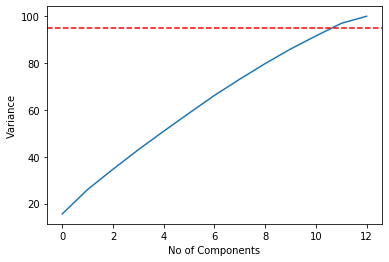

In [157]:
# let's apply PCA
nforpcac(xcs)

In [158]:
# n from 9 to 13
for i in range(9,13):
        print(i," ",modified_pcac(lrc,xcs,yc,i))

9   0.8162528216704289
10   0.8167042889390519
11   0.816854778028593
12   0.817607223476298


In [159]:
# we'll apply BFE
# let's compare BFE at k=9 and 10 using classification report
# at k=5, best results
xcsbfe1=bfec(lrc,xcs,yc,9)
xcsbfe2=bfec(lrc,xcs,yc,10)

In [160]:
print(classification(lrc,xcsbfe1,yc))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6003
           1       0.31      0.72      0.44       642

    accuracy                           0.82      6645
   macro avg       0.64      0.78      0.66      6645
weighted avg       0.90      0.82      0.85      6645



In [161]:
print(classification(lrc,xcsbfe2,yc))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6003
           1       0.31      0.72      0.44       642

    accuracy                           0.82      6645
   macro avg       0.64      0.78      0.66      6645
weighted avg       0.90      0.82      0.85      6645



In [162]:
# the results are the same
# we'll use k=9, means xcsbfe1

In [163]:
param_lrc={'warm_start':[True,False],
           'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridcvc(lrc,param_lrc,xcsbfe1,yc)

{'solver': 'newton-cg', 'warm_start': True}

In [164]:
lrc1=LogisticRegression(random_state=45,n_jobs=-1,solver= 'newton-cg', warm_start= True)

In [165]:
param_lrc1={'tol':[1e-7,1e-6,1e-5,1e-4,1e-3],'C':[0.1,0.2,0.3,0.4,0.5,1]}
gridcvc(lrc1,param_lrc1,xcsbfe1,yc)

{'C': 0.1, 'tol': 1e-07}

In [166]:
lrc2=LogisticRegression(random_state=45,n_jobs=-1,solver= 'newton-cg', warm_start= True,C= 0.1, tol= 1e-05)

In [167]:
get_scorec(lrc2,xcsbfe1,yc)

(0.815121412803532, 0.820015048908954)

In [168]:
get_scorec(lrc,xcsbfe1,yc)

(0.8149207304836444, 0.8204665161775772)

In [169]:
# untuned model is performing better

In [170]:
lrc.coef_.ravel()

array([ 0.57416451, -0.10965745,  0.41887136, -0.04272392, -0.31204914,
        0.33110854,  0.81523077, -0.07285585,  0.50455099])

In [171]:
# let's see the coef
coef=pd.DataFrame({'Variables':xcsbfe1.columns.values,
             'Coefficients':(lrc.coef_).ravel()})
coef

,Variables,Coefficients
0,age,0.574165
1,workclass,-0.109657
2,edunum,0.418871
3,occupation,-0.042724
4,relationship,-0.312049
5,sex,0.331109
6,capgain,0.815231
7,caploss,-0.072856
8,hoursperweek,0.504551


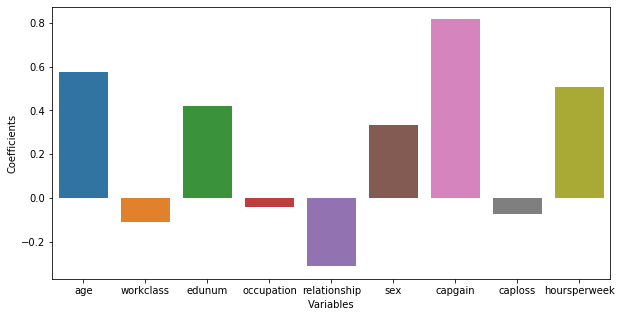

In [172]:
plt.figure(figsize=(10,5))
sns.barplot(data=coef,x='Variables',y='Coefficients')

In [173]:
coef.sort_values(by='Coefficients')

,Variables,Coefficients
4,relationship,-0.312049
1,workclass,-0.109657
7,caploss,-0.072856
3,occupation,-0.042724
5,sex,0.331109
2,edunum,0.418871
8,hoursperweek,0.504551
0,age,0.574165
6,capgain,0.815231


In [174]:
# lets remove caploss and occupation
xcscoef=xcsbfe1.drop(['caploss','occupation'],axis=1)
get_scorec(lrc,xcscoef,yc)

(0.8150712422235601, 0.8189616252821671)

In [175]:
# the score reduced

In [176]:
# lets boost lrc,xcsbfe1,yc
adalrc=AdaBoostClassifier(base_estimator=lrc, learning_rate=0.001, n_estimators=100, random_state=45)
get_scorec(adalrc,xcsbfe1,yc)

(0.8108067429259482, 0.81790820165538)

In [177]:
# the score didn't improve

In [178]:
# lets cross validate lrc,xcsbfe1,yc
crossc(lrc,xcsbfe1,yc)

(0.8162323081529552, 0.0027763434259610725)

In [179]:
# no over fitting or under fitting

In [180]:
# Evaluation metrics
acc, conf, clas=get_metricsc(lrc,xcsbfe1,yc)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8204665161775772
 
[[4990 1013]
 [ 180  462]]
 
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6003
           1       0.31      0.72      0.44       642

    accuracy                           0.82      6645
   macro avg       0.64      0.78      0.66      6645
weighted avg       0.90      0.82      0.85      6645



# KNN

In [181]:
# knnc=KNeighborsClassifier(n_jobs=-1)

In [182]:
# knnc with xcs 0.884406983744732, 0.8344620015048909

In [183]:
# Individual Model Pipeline:
# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [184]:
modified_bfec(knnc,xcs,yc,12)

0.8343115124153498

In [185]:
# modified_bfec(knnc,xcs,yc,11)

In [186]:
# took around 5 minutes

In [187]:
# we won't use bfe

In [188]:
# lets apply pca
for i in range(9,13):
        print(i," ",modified_pcac(knnc,xcs,yc,i))

9   0.8248306997742664
10   0.8291948833709556
11   0.8294958615500376
12   0.8344620015048909


In [189]:
# we won't use pca

In [193]:
KNeighborsClassifier?

In [195]:
# let's tune knn
param_knn={'p':[1,2],'leaf_size':[10,20,30,40]}
randomcvc(knnc,param_knn,xcs,yc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.6min finished


{'p': 1, 'leaf_size': 10}

In [196]:
knnc1=KNeighborsClassifier(n_jobs=-1,p=1,leaf_size=10)

In [198]:
param_knn1={'n_neighbors':range(2,13,3)}
randomcvc(knnc1,param_knn1,xcs,yc)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  3.1min remaining:   20.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.1min finished


{'n_neighbors': 11}

In [199]:
param_knn2={'n_neighbors':[9,10,11,12,13]}
randomcvc(knnc1,param_knn2,xcs,yc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.3min finished


{'n_neighbors': 12}

In [201]:
knnc2=KNeighborsClassifier(n_jobs=-1,p=1,leaf_size=10,n_neighbors=12)
get_scorec(knnc2,xcs,yc)

(0.8660947220549869, 0.8481565086531226)

In [202]:
# the score improved

In [203]:
knnc3=KNeighborsClassifier(n_jobs=-1,p=1,leaf_size=15,n_neighbors=12)
get_scorec(knnc3,xcs,yc)

(0.8660947220549869, 0.8481565086531226)

In [206]:
# cross validate knn2,xcs,yc
crossc(knnc2,xcs,yc)

(0.8480643393946601, 0.004095705805049373)

In [207]:
# no over or under fitting

In [208]:
# Evaluation metrics
acc, conf, clas=get_metricsc(knnc2,xcs,yc)
print(acc)
print(' ')
print(conf)
print(' ')
print(clas)

0.8481565086531226
 
[[4888  727]
 [ 282  748]]
 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      5615
           1       0.51      0.73      0.60      1030

    accuracy                           0.85      6645
   macro avg       0.73      0.80      0.75      6645
weighted avg       0.88      0.85      0.86      6645



# SVC

In [209]:
# svc with xcs 0.8505920128436685, 0.8480060195635817

In [210]:
# svc=SVC(random_state=45)

In [211]:
# lets apply BFE
modified_bfec(svc,xcs,yc,12)

0.8501128668171558

In [216]:
# lets apply PCA
# n from 9 to 13
for i in range(9,13):
        print(i," ",modified_pcac(svc,xcs,yc,i))

9   0.8380737396538751
10   0.8418359668924003
11   0.8451467268623025
12   0.8462001504890896


In [219]:
# bfe is taking a lot of time,
# we won't use it

In [220]:
SVC?

In [221]:
# lets tune the model
param_svc={'kernel':['rbf','poly']}
randomcvc(svc,param_svc,xcs,yc)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   24.7s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   40.5s finished


{'kernel': 'rbf'}

In [224]:
svc1=SVC(random_state=45,kernel='rbf')
# lets tune the model
param_svc1={'C':[1.5,1.6,1.7,1.8]}
randomcvc(svc1,param_svc1,xcs,yc)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:   41.5s remaining:   20.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.0min finished


{'C': 1.8}

In [225]:
svc2=SVC(random_state=45,kernel='rbf',C=2)
get_scorec(svc2,xcs,yc)

(0.8541541240216737, 0.8495109104589917)

In [226]:
# the score improved a little

In [227]:
svc3=SVC(random_state=45,kernel='rbf',C=2.5)
get_scorec(svc3,xcs,yc)

(0.8549568533012242, 0.8495109104589917)

In [229]:
svc2=SVC(random_state=45,kernel='rbf',C=2,probability=True)

In [232]:
# # lets boost svc2,xcs,yc
# adasvc=AdaBoostClassifier(base_estimator=svc2, learning_rate=0.001, n_estimators=50, random_state=45)
# get_scorec(adasvc,xcs,yc)

In [233]:
# ada boost is taking too long

In [235]:
# # lets cross validate 
# crossc(svc2,xcs,yc)

In [236]:
# here, we'll save the model
import joblib
joblib.dump(svc2,'svc2_cencus.pkl')

['svc2_cencus.pkl']